<a href="https://colab.research.google.com/github/pradeepprasad/Machine_Learning_Workspace/blob/master/Fruit_Quality_Check_0_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model has been trained via Image_Pre_Processing_0_2 script with over 95 percent accuracy. Let's load model and test on some unseen uploaded images.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Get some useful libraries and to ensure TF > 2 version is being used.

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


In [3]:
# Recreate the exact same model, including its weights and the optimizer
loaded_model = tf.keras.models.load_model('/content/drive/My Drive/model/fruit_quality_check_model_0003.hdf5')

# Show the model architecture
loaded_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)            

Model is loaded and now time to see its accuracy. before that set test directory path.

In [4]:
PATH = '/content/drive/My Drive/data/sample_data/dataset/dataset'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'test')
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')


Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [5]:
loss, acc = loaded_model.evaluate(val_data_gen,verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))


22/22 - 822s - loss: 0.1191 - accuracy: 0.9533
Restored model, accuracy: 95.33%


## **Unseen images. Time to work on some new images available to test the model prediction of class.**

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [40]:
PATH1 = '/content/drive/My Drive/temp/images/cnn'
validation_dir1 = os.path.join(PATH1)
validation_image_generator1 = ImageDataGenerator(rescale=1./255) # Generator for our validation data
val_data_gen1 = validation_image_generator1.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir1,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH)
                                                              )

Found 8 images belonging to 1 classes.


In [0]:
fruit_class_dic = {0: 'freshapples',
 1: 'freshbanana',
 2: 'freshoranges',
 3: 'rottenapples',
 4: 'rottenbanana',
 5: 'rottenoranges'}

In [16]:
fruit_class_dic

{0: 'freshapples',
 1: 'freshbanana',
 2: 'freshoranges',
 3: 'rottenapples',
 4: 'rottenbanana',
 5: 'rottenoranges'}

In [0]:
def plotImages_all(images_arr, predicted_class_arr):
    num_images = len(images_arr)
    fig, axes = plt.subplots(1, num_images, figsize=(20,20))
    axes = axes.flatten()
    for img, ax, cls in zip( images_arr, axes, predicted_class_arr):
        ax.imshow(img)
        ax.axis('off')
        ax.title.set_text(fruit_class_dic.get(cls))
    plt.tight_layout()
    plt.show()

In [0]:
sample_validation_images_uploaded, _ = next(val_data_gen1)

In [42]:
predicted_classes = loaded_model.predict_classes(sample_validation_images_uploaded[:10])
predicted_classes

array([5, 4, 4, 4, 4, 4, 4, 2])

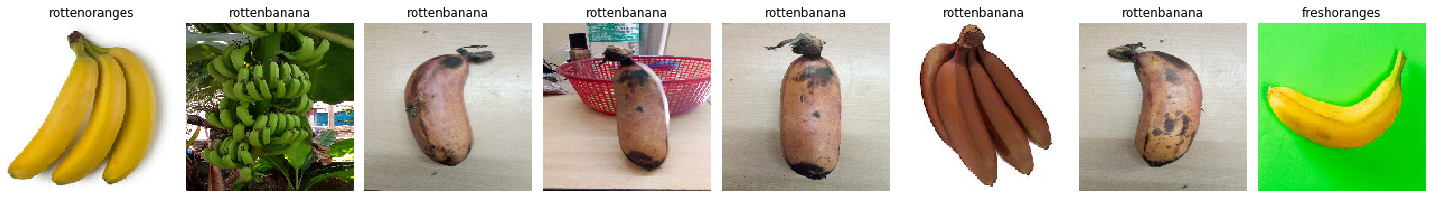

In [43]:
plotImages_all(sample_validation_images_uploaded[:10], predicted_classes)

# **Still model is overfitting. incorrect classes are predicted for unseen data though correct classes are predicted to seen images.**

# **Now test on Images from seen (validation) data.**

In [44]:
sample_validation_images, _ = next(val_data_gen)
predicted_classes = loaded_model.predict_classes(sample_validation_images[:10])
predicted_classes

array([4, 1, 1, 3, 4, 5, 4, 4, 0, 5])

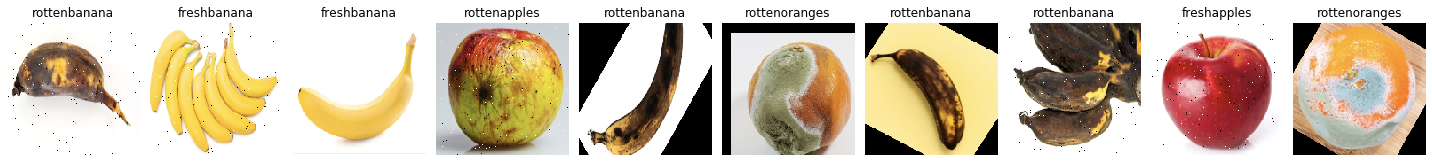

In [45]:
plotImages_all(sample_validation_images[:10], predicted_classes)